In [25]:
# 导入相关的库
import numpy as np
import pandas as pd

# 数据勘查

In [26]:
# 读取数据 - 波士顿房价数据集
data = pd.read_csv(r'../Datasets/boston.csv')

波士顿房价数据集字段说明
* CRIM 房屋所在镇的犯罪率
* ZN 面积大于25000平方英尺住宅所占的比例
* INDUS 房屋所在镇非零售区域所占比例
* CHAS 房屋是否位于河边，如果位于河边，则值为1，否则值为0.
* NOX 一氧化氮的浓度
* RM 平均房间数量
* AGE 1940年前建成房屋所占的比例
* DIS 房屋距离波士顿五大就业中心的加权距离
* RAD 距离房屋最近的公路
* TAX 财产税额度
* PTRATIO 房屋所在镇师生比例
* B 计算公式： 1000 * （房屋所在镇非美籍人口所在比例 - 0.63） ** 2
* LSTAT 弱势群体人口所占比例
* MEDV 房屋的平均价格

In [28]:
# 查看数据的基本信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [29]:
# 查看数据是否有重复值
data.duplicated().any()

False

In [30]:
# 前五条数据
# data.head()

# 最后五条数据
# data.tail()

# 随机5条数据
data.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
121,0.07165,0.0,25.65,0.0,0.581,6.004,84.1,2.1974,2.0,188.0,19.1,377.67,14.27,20.3
209,0.43571,0.0,10.59,1.0,0.489,5.344,100.0,3.8750,4.0,277.0,18.6,396.90,23.09,20.0
474,8.05579,0.0,18.10,0.0,0.584,5.427,95.4,2.4298,24.0,666.0,20.2,352.58,18.14,13.8
350,0.06211,40.0,1.25,0.0,0.429,6.490,44.4,8.7921,1.0,335.0,19.7,396.90,5.98,22.9
77,0.08707,0.0,12.83,0.0,0.437,6.140,45.8,4.0905,5.0,398.0,18.7,386.96,10.27,20.8


# 算法实现

In [31]:
"""梯度下降法实现线性回归"""

class LinearRegression:
    
    # 初始化
    def __init__(self, alpha, times):
        # float类型，学习率，用来控制步长，即权重调整的幅度
        self.alpha = alpha
        # int类型，循环迭代的次数
        self.times = times
    
    # 根据提供的训练集，对模型进行训练
    # X：类数组类型，形状[样本数量，特征数量]，特征矩阵
    # y：类数组类型，形状[样本数量]
    def fit(self, X, y):
        # 转化为ndarray对象
        X = np.asarray(X)
        y = np.asarray(y)
        
        # 创建权重的向量，初始值为0，或其他任何值
        # 长度比体征数量多1，多出的一个值就是截距
        self._w = np.zeros(X.shape[1] + 1)
        
        # 创建损失列表，用来保存每次迭代后的损失值
        # 损失值计算：(预测值 - 真实值) 的平方和除以2
        self._loss = []
        
        # 循环迭代
        # 在每次迭代过程中，不断地调整权重值，使得损失值不断减小
        for i in range(self.times):
            # 计算预测值
            predict_y = np.dot(X, self._w[1:]) + self._w[0]
            
            # 计算真实值与预测值之间的差距
            err = y - predict_y
            
            # 将损失值加入到损失列表中
            self._loss.append(np.sum(err ** 2) / 2)
            
            # 根据差距调整权重
            # 权重(j) =  权重(j) + 学习率 * sum((y - predict_y) * x(j))
            self._w[0] += self.alpha * np.sum(err)
            self._w[1:] += self.alpha * np.dot(X.T, err)

    # 根据样本数据进行预测
    def predict(self, X):
        X = np.asarray(X)
        result = np.dot(X, self._w[1:]) + self._w[0]
        return result

In [32]:
"""对数据进行标准化处理

避免因每个特征的数量级不同，从而在梯度下降的过程中带来影响
"""

class StandardScaler:
    # 计算每个特征列的均值及标准差
    def fit(self, X):
        X = np.asarray(X)
        self._mean = np.mean(X, axis=0)
        self._std = np.std(X, axis=0)
        
    # 对给定数据进行标准化处理
    # 将每一列都变成标准正态分布的数据
    def transform(self, X):
        return (X - self._mean) / self._std
    
    # 对数据进行转换，返回转换后的结果
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

In [33]:
# 构建数据集
d = data.sample(len(data), random_state=0)

# 取前400条数据作为训练集
train_X = d.iloc[:400, :-1]  # 特征
train_y = d.iloc[:400, -1]  # 结果

# 取剩余条数的数据为测试集
test_X = d.iloc[400:, :-1]
test_y = d.iloc[400:, -1]

In [34]:
# 对数据进行标准化处理
s = StandardScaler()
train_X = s.fit_transform(train_X)
test_X = s.transform(test_X)

s2 = StandardScaler()
train_y = s2.fit_transform(train_y)
test_y = s2.transform(test_y)

In [39]:
# 训练模型
lr = LinearRegression(alpha=0.0005, times=30)
lr.fit(train_X, train_y)

In [40]:
# 查看各个特征的权重值
display(lr._w)

array([ 1.62314606e-16, -8.39827742e-02,  4.68670164e-02, -3.78527376e-02,
        6.93099815e-02, -1.60014126e-01,  2.99943851e-01, -3.15865569e-03,
       -2.50503275e-01,  1.39587503e-01, -7.11633454e-02, -1.89601494e-01,
        9.67349593e-02, -4.14591470e-01])

In [41]:
# 查看损失列表
display(lr._loss)

[200.0,
 107.16607914924599,
 88.91896294017965,
 79.79699900354936,
 74.33495874650424,
 70.91957416161512,
 68.7061649307762,
 67.21401040114299,
 66.1640222876996,
 65.39167226769372,
 64.79841173790199,
 64.32419686701928,
 63.931764580828826,
 63.597523544384345,
 63.30621040418721,
 63.04771396296815,
 62.815162490703536,
 62.603756023524795,
 62.4100435515406,
 62.23146925589152,
 62.066083535880054,
 61.91235626237454,
 61.769054258542596,
 61.63515964919503,
 61.50981454722144,
 61.39228292995466,
 61.28192388056274,
 61.17817244276074,
 61.080525645230196,
 60.98853208639386]

In [42]:
# 使用训练好的模型进行预测
predict_y = lr.predict(test_X)

#查看预测结果
predict_y

array([ 1.26757573,  1.0430217 , -1.39520517, -1.12166971,  0.02735456,
        1.29368556, -0.30065873, -0.26081531, -0.77227817,  0.44648711,
        1.94344122,  0.36120008,  1.85561088,  0.299792  , -0.21735886,
       -0.954983  , -1.04495228, -0.90935185, -0.35412843, -2.16654111,
        0.56586694,  0.40152289,  1.89479629, -0.13512809,  0.00944409,
        1.1210227 ,  1.01547727, -1.41230636,  0.32076329,  2.1824728 ,
       -0.55936606, -0.41946162,  0.35661909, -0.40251326, -1.81587186,
       -0.28797924,  1.36477416, -0.64867966,  0.06798278, -0.95018054,
        0.18724787, -0.31186061, -0.46829633, -0.33873704,  1.00999389,
       -0.20424405,  0.86858796,  1.25345792,  2.08233793, -0.42897482,
       -0.57723896,  1.55599274, -0.38810435, -1.43593139, -0.76768489,
        0.19211451, -0.26113628, -0.57514121,  0.45629059, -1.10098693,
       -1.74166594, -0.26072145, -1.5358127 ,  0.55720032, -1.88019452,
        0.72638567,  1.12703452,  0.01217427, -0.53446859, -0.48

# 模型评估

在回归任务（对连续值的预测）中，常见的评估指标（Metric）有：

- 平均绝对误差 MAE: Mean Absolute Error
- 均方误差 MSE: Mean Square Error
- 均方根误差 RMSE: Root Mean Square Error
- 平均绝对百分比误差 MAPE: Mean Absolute Percentage Error

常用的有MAE和MSE

### 平均绝对误差 MAE
MAE用来衡量预测值和真实值之间的平均绝对误差，MAE越小表示模型越好
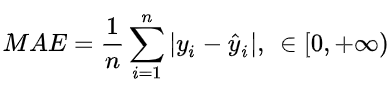

### 均方误差 MSE
即是线性回归的目标函数，也可以作为评估指标，越小越好
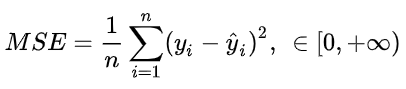

### 均方根误差 RMSE
RMSE是在MSE的基础上开根号而来，越小越好
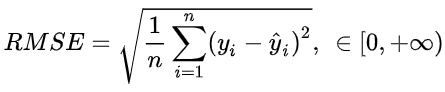

### 平均绝对百分比误差 MAPE
MAPE和MAE类似，是在MAE的基础上做了标准化处理，越小越好
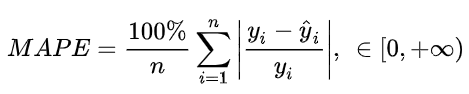

In [43]:
print('模型评估\n')
print('平均绝对误差MAE: ', np.mean(np.abs(test_y - predict_y)))
print('均方误差MSE: ', np.mean((test_y - predict_y) ** 2))
print('均方根误差RMSE: ', np.sqrt(np.mean((test_y - predict_y) ** 2)))
print('平均绝对百分比误差MAPE: ', np.mean(np.abs((test_y - predict_y) / test_y)))

模型评估

平均绝对误差MAE:  0.3293833494995838
均方误差MSE:  0.20261262239668243
均方根误差RMSE:  0.450125118602242
平均绝对百分比误差MAPE:  1.917771774346809


# 数据可视化

In [44]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'SimHei'
mpl.rcParams['axes.unicode_minus'] = False

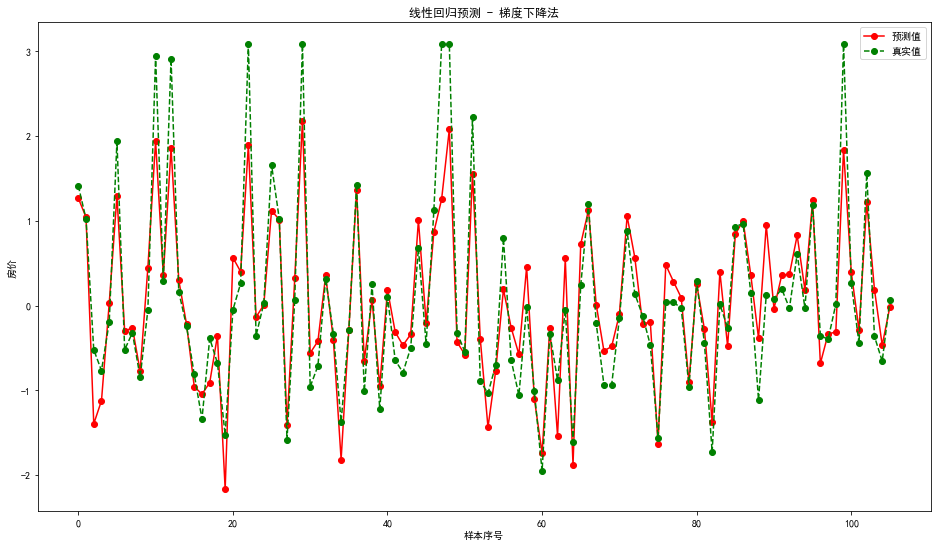

In [46]:
# 指定绘图大小
plt.figure(figsize=(16,9))

# 绘制预测值
plt.plot(predict_y, 'ro-', label='预测值')

# 绘制真实值
plt.plot(test_y.values, 'go--', label='真实值')

# 绘图
plt.title('线性回归预测 - 梯度下降法')
plt.xlabel('样本序号')
plt.ylabel('房价')
plt.legend()
plt.show()

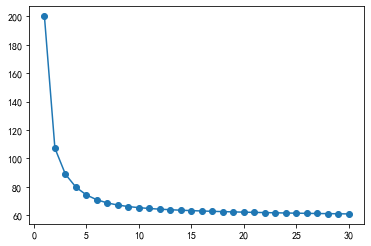

In [47]:
# 绘制累计误差值
plt.plot(range(1, lr.times + 1), lr._loss, 'o-')